# Digital Signal Processing - Spectograms
-------------------------------------------

Some of the basic ideas of spectrogram on a modulaiton signal and others are covered 
* Generating modulation signal in the digital domain (X)
* Visualizing the signal (X)
* Look at FFT of signal (using scipy) (X)
* FFT of half sine1 and half sine2 signals (X)
* Look at Spectrogram of the signals  (X)
* Trying modulation of one spectral component for amplitude modulation of the signal (X)

In [107]:
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
from scipy import signal

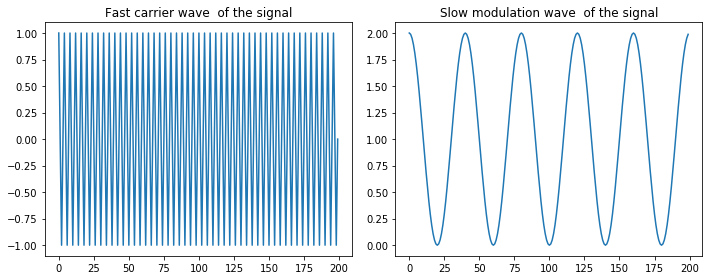

In [108]:
Fs=200 
Fc=50
Fm=5

fc=Fc/Fs
fm=Fm/Fs

N=(Fs/Fm)*20   #Atleast have 10 periods of the carrier
n=np.arange(0,N)

xc=np.cos(2*np.pi*fc*n)

xm=1+np.cos(2*np.pi*fm*n)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns

ax1.plot(xc[:Fs])
ax1.set_title('Fast carrier wave  of the signal')


ax2.plot(xm[:Fs])
ax2.set_title('Slow modulation wave  of the signal')

plt.tight_layout()  
plt.show()

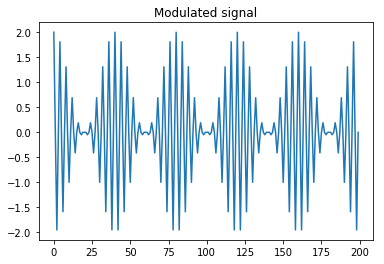

In [109]:
xd=xc*xm
plt.plot(xd[:1*Fs])
plt.title('Modulated signal')
plt.show()

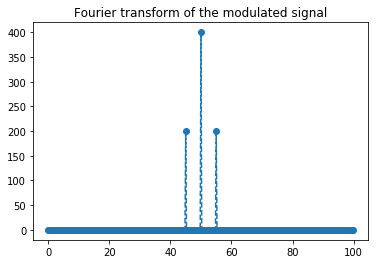

In [110]:
Xd=fft.fft(xd)
h=int(N/2)
freq=np.arange(0,N)*Fs/N
plt.plot(freq[:h],np.abs(Xd)[:h],ls='--',marker='o')
plt.title('Fourier transform of the modulated signal')
plt.show()

#### Fourier spectrum of the modulated signal
From some simple mathematical decomposition of the $\cos(A)\cos(B)$, we will see that the fourier transform of such a signal directly gives the two fm+fc and fm-fc as the frequencies


#### Fourier Transform of signals w/ various  frequencies 
-----------------------------------------------------

The limitation of fourier transform is it lack of time resolution and what we see is all the different components irrespective of their time

Here we will consider two cases:
* A signal with three components one after the other
* Signal with the three components togather

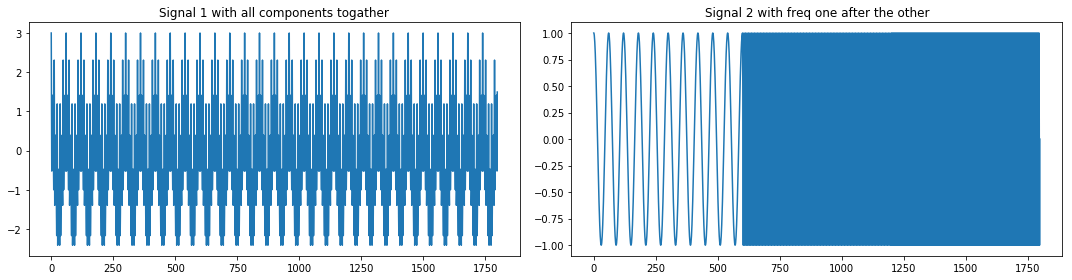

In [111]:
Fs=60
F1=1
F2=10
F3=15

f1=F1/Fs
f2=F2/Fs
f3=F3/Fs

N=(Fs/F1)*10  #Atleast have X periods of the carrier
n1=np.arange(0,3*N)
n2=np.arange(0,N)

y1=np.cos(2*np.pi*f1*n1) +np.cos(2*np.pi*f2*n1) + np.cos(2*np.pi*f3*n1)

y2=np.hstack((np.cos(2*np.pi*f1*n2) ,np.cos(2*np.pi*f2*n2), np.cos(2*np.pi*f3*n2)))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))  # 1 row, 2 columns

ax1.plot(y1)
ax1.set_title('Signal 1 with all components togather')


ax2.plot(y2)
ax2.set_title('Signal 2 with freq one after the other')

plt.tight_layout()  
plt.show()



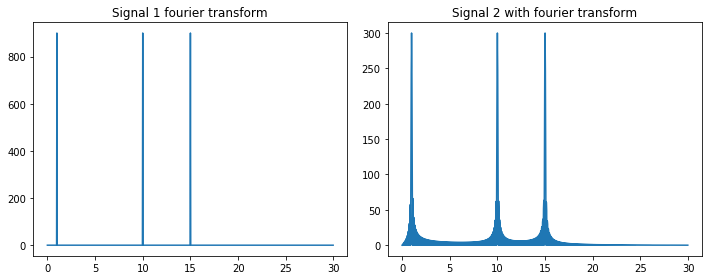

In [112]:
#Now getting the fourier transform of the two and plotting it
Y1=fft.fft(y1)
Y2=fft.fft(y2)
h=int(3*N/2)
freq=np.arange(0,3*N)*Fs/(3*N)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
ax1.plot(freq[:h],np.abs(Y1[:h]))
ax1.set_title('Signal 1 fourier transform')


ax2.plot(freq[:h],np.abs(Y2[:h]))
ax2.set_title('Signal 2 with fourier transform')

plt.tight_layout()  
plt.show()

Now we visualize the spectogram for these two signals:

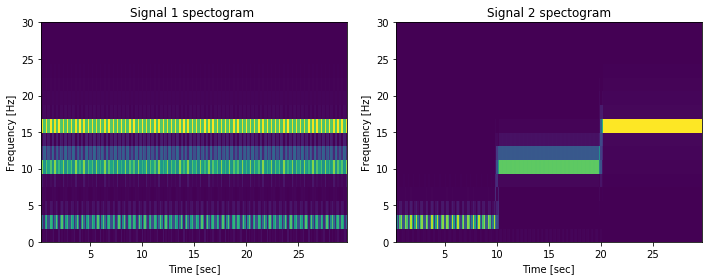

In [123]:

fy1, ty1, Sy1 = signal.spectrogram(y1, Fs,nperseg=32,noverlap=24)
fy2, ty2, Sy2 = signal.spectrogram(y2, Fs,nperseg=32,noverlap=24)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns

ax1.pcolormesh(ty1, fy1, Sy1)
ax1.set_title('Signal 1 spectogram ')
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')

ax2.pcolormesh(ty2, fy2, Sy2)
ax2.set_title('Signal 2 spectogram')
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')

plt.tight_layout()  
plt.show()



Now we go back to the modulated signal and try to look at it's spectrogram

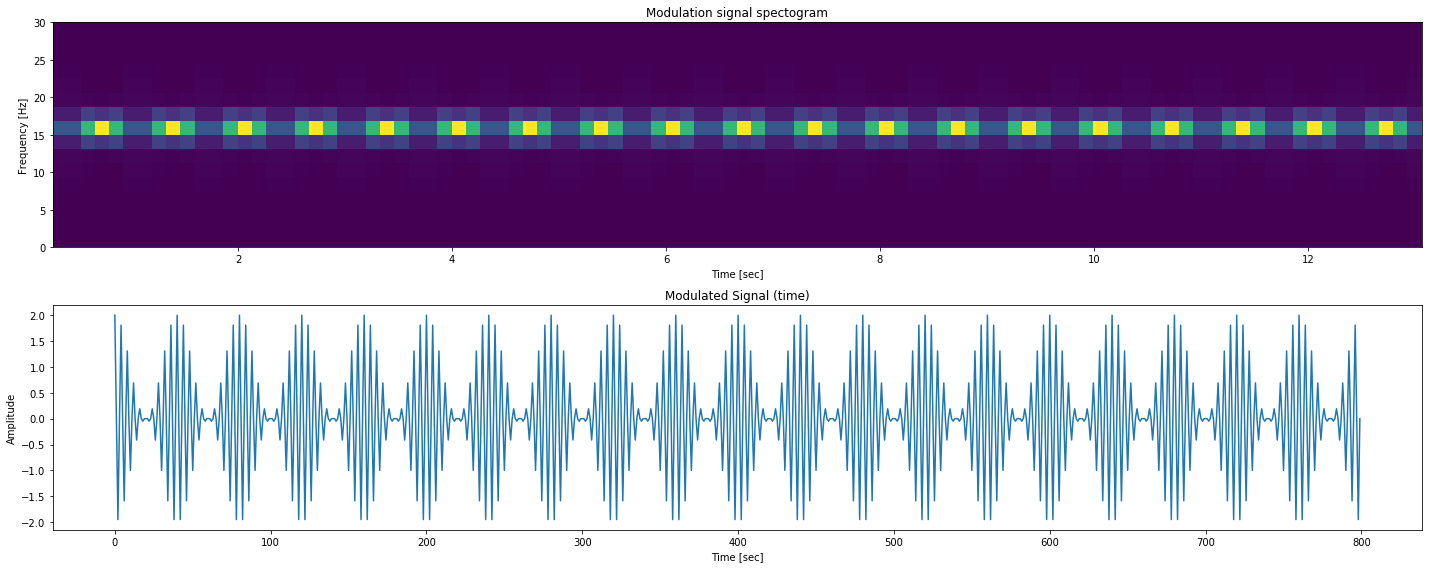

In [115]:
fyd, tyd, Syd = signal.spectrogram(xd, Fs,nperseg=32,noverlap=24)


fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,8))  # 1 row, 2 columns

ax1.pcolormesh(tyd, fyd, Syd)
ax1.set_title('Modulation signal spectogram')
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')

ax2.plot(xd)
ax2.set_title('Modulated Signal (time)')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time [sec]')



plt.tight_layout()  
plt.show()



This is an example of **Amplitude modulation** where the signal components are changing with respect to the slow modulation frequency

Now we consider a single (**spectral**) component of the signal (at 16.875 Hz) and see how it changes
Finally --> rate at which it changes is the rate of modulation

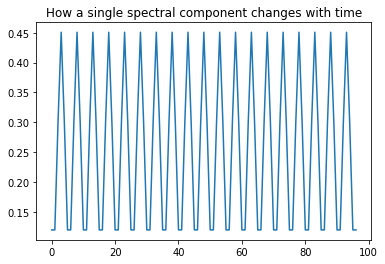

In [121]:
plt.plot(Syd[int(16/(60/32)),:])
plt.title('How a single spectral component changes with time')
plt.show() 

The sampling rate of this one can be understood from the window size and overlap size chosen before. As it moves 8 steps at a time the sampling rate will be 60Hz divided by 8, i.e. 7.5 Hz